In [410]:
import pandas as pd
import os
import opensoundscape
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [411]:
# load datasets
CC_2004_07 = pd.read_csv('modified_annotations/MasterSheet_modification.csv')
CC_2004_07.head()

,audio_file,annotation,high_f,low_f,start_time,end_time
0,/Users/luisbarajas/Desktop/Projects/Course_Pro...,D,74,22,213.746,217.114
1,/Users/luisbarajas/Desktop/Projects/Course_Pro...,D,64,31,161.000,164.000
2,/Users/luisbarajas/Desktop/Projects/Course_Pro...,D,73,26,74.355,77.723
3,/Users/luisbarajas/Desktop/Projects/Course_Pro...,D,92,19,136.450,139.363
4,/Users/luisbarajas/Desktop/Projects/Course_Pro...,D,72,32,29.238,32.789


In [412]:
# audio file name
audio_file_name = CC_2004_07['audio_file'][4]
start_time = CC_2004_07['start_time'][4]

# collecting audio
audio = opensoundscape.Audio.from_file(audio_file_name, sample_rate=48000, offset=start_time, duration=6)

if audio.samples.shape[0] > 0:  # Assuming audio.samples returns a numpy array of audio samples
    spec = opensoundscape.Spectrogram.from_audio(audio, window_type='hamming', window_samples=24000, 
                                                     overlap_samples=21600, fft_size=48000, 
                                                     scaling='density')

# storing image as 2 dim array
spec_image = spec.bandpass(0, 200).to_image()
spec_image_arr = np.array(spec_image).astype(float)


In [413]:
# collecting portion of image containing only noise
background_noise_model = np.mean(spec_image_arr[:, :100], axis=1)

In [414]:
# Subtract the background noise model from each column of the spectrogram
spec_image_arr_mod2 = spec_image_arr.copy()
for i in range(spec_image_arr.shape[1]):
    spec_image_arr_mod2[:, i] -= background_noise_model

In [415]:
# apply threshold to filter out parts of the background ( difference between background and foreground image)
spec_image_arr_mod3 = spec_image_arr_mod2.copy()
spec_image_arr_mod3[spec_image_arr_mod3 < 0 ] = 0

spec_image_arr_mod3.shape

(201, 111)

In [416]:
def draw_img(img_vector, h=201, w=111):
    """
    1. takes img_vector,
    2. reshapes into right dimensions,
    3. draws the resulting image
    """
    
    
    plt.imshow( (img_vector).reshape(h,w), cmap=plt.cm.gray)
    
    plt.xticks(())
    plt.yticks(())

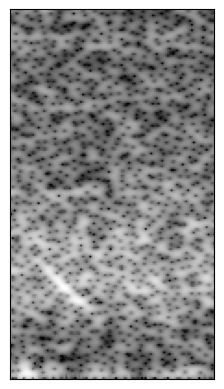

In [417]:
draw_img(spec_image_arr)

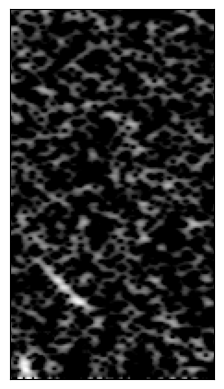

In [418]:
draw_img(spec_image_arr_mod3)